In [128]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import scipy.optimize as opt
from tqdm import tqdm


<h1>Visualizing Our Function</h1>

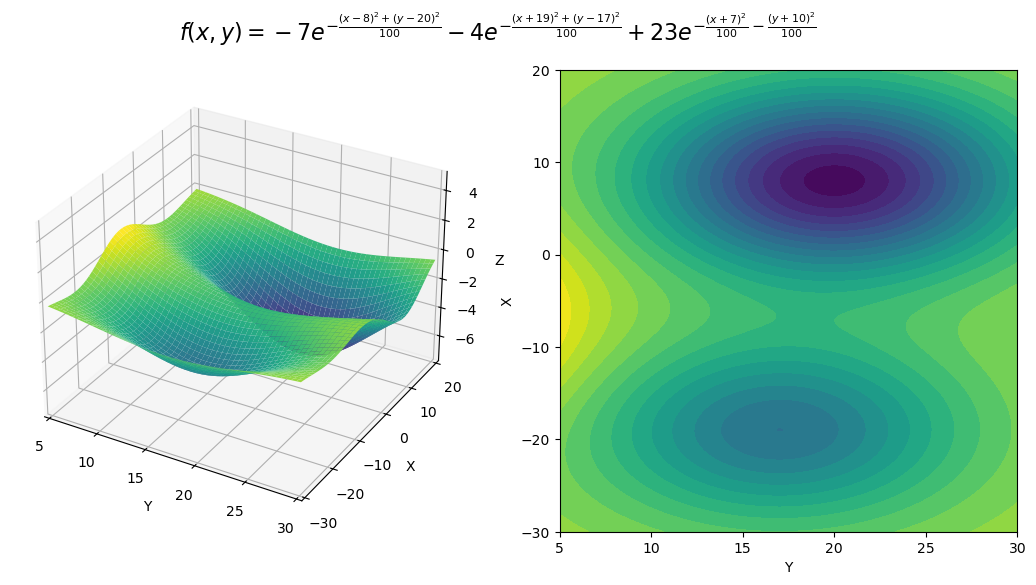

In [129]:
# Function for the Rosenbrock function
f = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2
f = lambda x: -7 * jnp.exp(-((x[0]-8)**2 + (x[1]-20)**2) / 100) - 4 * jnp.exp(-((x[0]+19)**2 + (x[1]-17)**2) / 100) + 13 * jnp.exp(-((x[0]+7)**2) / 100 - ((x[1]+10)**2) / 100)


# Visualize the function
min_x, max_x = -30, 20
min_y, max_y = 5, 30
y = np.linspace(min_y, max_y, 300)
x = np.linspace(min_x, max_x, 300)

# Create the meshgrid
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

# Create subplots
axs = plt.figure(figsize=(13, 6), dpi=100)

# Define our plotting stuff
ax = axs.add_subplot(121, projection='3d')
# ax.view_init(elev=30, azim=40)
ax.plot_surface(Y, X, Z, cmap='viridis', alpha=0.99)

# Set the axes limits
ax.set(xlim=(min(y), max(y)), ylim=(min(x), max(x)), zlim=(-7.5, 5), xlabel=r'Y', ylabel=r'X', zlabel=r'Z')

# Get contour plot
ax = axs.add_subplot(122)
contour = ax.contourf(Y, X, Z, 25, cmap='viridis')
ax.set(xlim=(min(y), max(y)), ylim=(min(x), max(x)), xlabel=r'Y', ylabel=r'X')

plt.suptitle(r'$f(x,y) = -7e^{-\frac{(x-8)^2 + (y-20)^2}{100}} - 4e^{-\frac{(x+19)^2 + (y-17)^2}{100}} + 23e^{-\frac{(x+7)^2}{100} - \frac{(y+10)^2}{100}}$', fontsize=16)

plt.show()

<h1>Visualize Gradient Descent</h1>

  0%|          | 27/100000 [00:00<01:15, 1331.96it/s]


Converged at x=-19.92, y=18.49 after 27 iterations


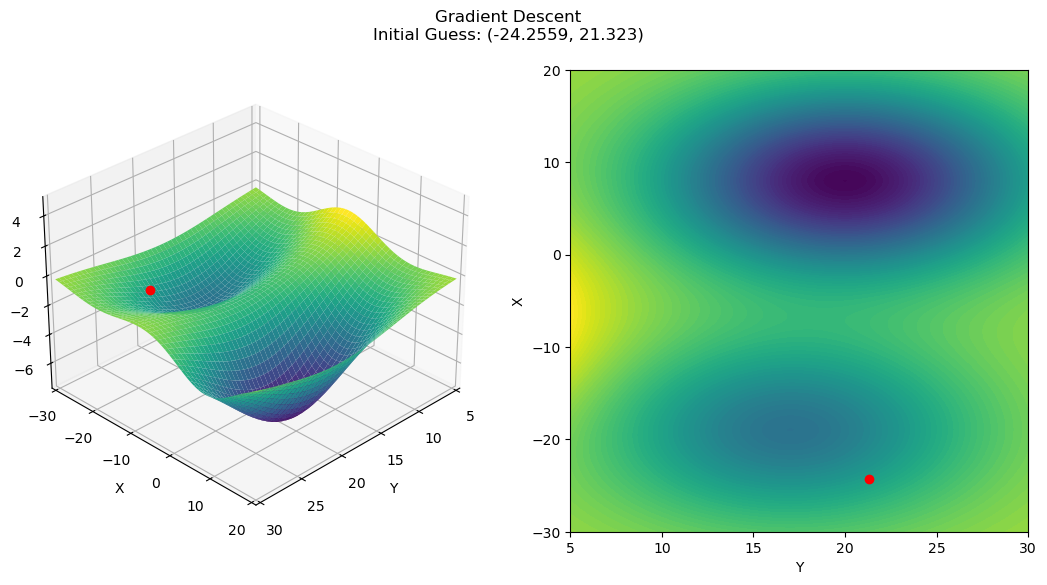

In [148]:
# Define our gradient descent function
def gradient_descent(f, x0, lr=0.1, tol=1e-6, maxiter=10**5):
    # Get our initial guess
    x_vals = np.array([x0])
    x = x0
    
    # Iterate until we converge
    for i in tqdm(range(maxiter)):
        # Get the gradient
        grad = opt.approx_fprime(x, f, 1e-6)
        
        # Update our guess
        x = x - lr * grad
        x_vals = np.vstack((x_vals, x))
        
        # Check for convergence
        if np.linalg.norm(grad) < tol:
            break
    return x_vals, i

# Define our initial guess
x0, y0 = np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)

# Define our learning rate
alpha = 0.7

# Create and add x0, y0 to the list
values = [x0, y0]

# Perform gradient descent
values, iters = gradient_descent(f, [x0, y0], alpha, tol=1e-8)
z_values = f(values.T)

print(f'Converged at x={values[-1][0]:.2f}, y={values[-1][1]:.2f} after {iters} iterations')

# Create subplots
axs = plt.figure(figsize=(13, 6), dpi=100)
axs.suptitle(f'Gradient Descent\nInitial Guess: ({round(x0, 4)}, {round(y0, 4)})')

# Define our plotting stuff
ax1 = axs.add_subplot(121, projection='3d')
ax2 = axs.add_subplot(122)

# Set updates for our axes
ax1.plot_surface(Y, X, Z, cmap='viridis')
ax1.view_init(elev=30, azim=45)
ax1.set(xlim=(min_y, max_y), ylim=(min_x, max_x), zlim=(-7.5, 5), xlabel=r'Y', ylabel=r'X', zlabel=r'Z')

ax2.contourf(Y, X, Z, 100, cmap='viridis')
ax2.set(xlim=(min_y, max_y), ylim=(min_x, max_x), xlabel='Y', ylabel='X')

line1, = ax1.plot([], [], [], color='red', linestyle='-', marker='o', zorder=10)
line2, = ax2.plot([], [], color='red', linestyle='-', marker='o', zorder=10)

# Define the update function for animation
def update(frame):
    frame = int(frame)
    
    # Animate surface plot
    line1.set_data(values[:frame+1, 1], values[:frame+1, 0])
    line1.set_3d_properties([z_values[:frame+1]])

    # Animate contour plot
    line2.set_data(values[:frame+1, 1], values[:frame+1, 0])
    
    return (line1, line2)    
    
# Create the animation
ani = FuncAnimation(axs, update, frames=len(values), interval=75)
HTML(ani.to_html5_video())

In [149]:
# Save the graph as a gif.
ani.save("func1.gif", dpi=250, writer=PillowWriter(fps=20))

<h1>Polyak's Heavy Ball Method</h1>

  0%|          | 117/100000 [00:00<00:52, 1918.13it/s]


Converged at x=-18.83, y=17.07 after 117 iterations


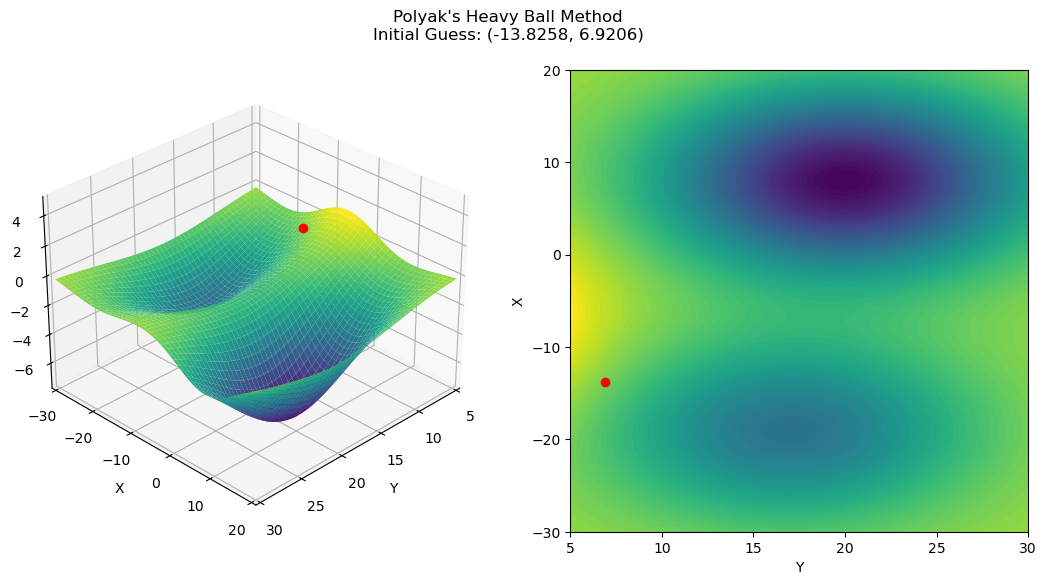

In [155]:
def heavy_ball(f, x0, alpha=0.1, beta=0.7, tol=1e-6, maxiter=10**5):
    # Get our initial guess
    x_vals = np.array([x0])
    x = x0
    x_prev = x0
    
    # Iterate until we converge
    for i in tqdm(range(maxiter)):
        # Get the gradient
        grad = opt.approx_fprime(x, f, 1e-6)
        
        # Update our guess
        x_new = x - alpha * grad + beta * (x - x_prev)
        x_vals = np.vstack((x_vals, x_new))
        
        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x_prev = x
        x = x_new
        
    return x_vals, i

# Define our initial guess
x0, y0 = np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)

# Define our learning rate
alpha = 0.7

# Create and add x0, y0 to the list
values = np.array([x0, y0])

# Perform gradient descent
values, iters = heavy_ball(f, values, alpha, tol=1e-8)
z_values = f(values.T)

print(f'Converged at x={values[-1][0]:.2f}, y={values[-1][1]:.2f} after {iters} iterations')

# Create subplots
axs = plt.figure(figsize=(13, 6), dpi=100)
axs.suptitle(f"Polyak's Heavy Ball Method\nInitial Guess: ({round(x0, 4)}, {round(y0, 4)})")

# Define our plotting stuff
ax1 = axs.add_subplot(121, projection='3d')
ax2 = axs.add_subplot(122)

# Set updates for our axes
ax1.plot_surface(Y, X, Z, cmap='viridis')
ax1.view_init(elev=30, azim=45)
ax1.set(xlim=(min_y, max_y), ylim=(min_x, max_x), zlim=(-7.5, 5), xlabel=r'Y', ylabel=r'X', zlabel=r'Z')

ax2.contourf(Y, X, Z, 100, cmap='viridis')
ax2.set(xlim=(min_y, max_y), ylim=(min_x, max_x), xlabel='Y', ylabel='X')

line1, = ax1.plot([], [], [], color='red', linestyle='-', marker='o', zorder=10)
line2, = ax2.plot([], [], color='red', linestyle='-', marker='o', zorder=10)

# Define the update function for animation
def update(frame):
    frame = int(frame)
    
    # Animate surface plot
    line1.set_data(values[:frame+1, 1], values[:frame+1, 0])
    line1.set_3d_properties([z_values[:frame+1]])

    # Animate contour plot
    line2.set_data(values[:frame+1, 1], values[:frame+1, 0])
    
    return (line1, line2)    
    
# Create the animation
ani = FuncAnimation(axs, update, frames=len(values), interval=50)
HTML(ani.to_html5_video())

In [156]:
# Save the graph as a gif.
ani.save("func2.gif", dpi=250, writer=PillowWriter(fps=20))

  0%|          | 77/100000 [00:00<01:38, 1019.46it/s]


Converged at x=8.11, y=20.01 after 77 iterations


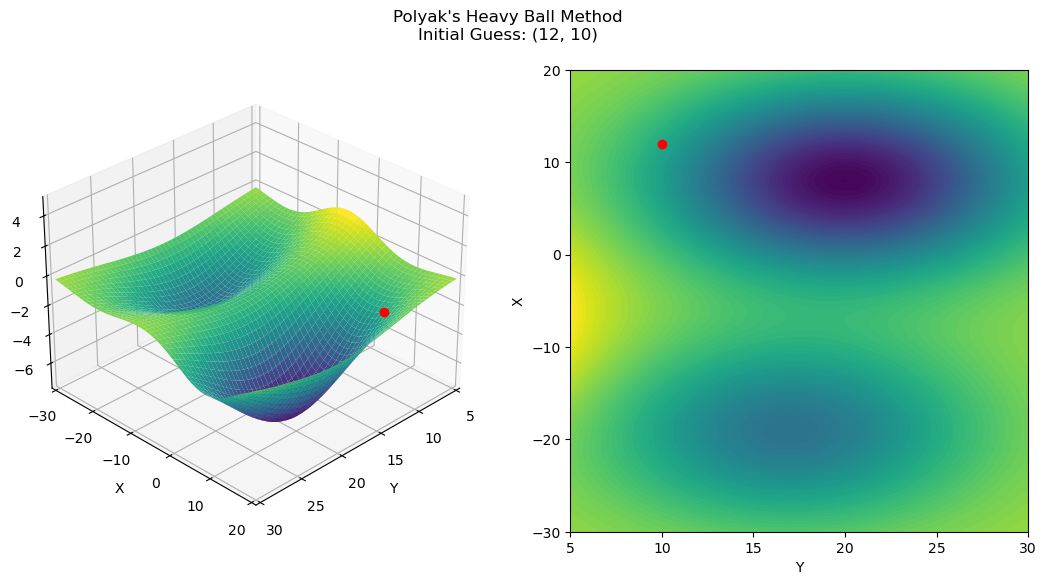

In [165]:
def heavy_ball(f, x0, alpha=0.1, beta=0.7, tol=1e-6, maxiter=10**5):
    # Get our initial guess
    x_vals = np.array([x0])
    x = x0
    x_prev = x0
    
    # Iterate until we converge
    for i in tqdm(range(maxiter)):
        # Get the gradient
        grad = opt.approx_fprime(x, f, 1e-6)
        
        # Update our guess
        x_new = x - alpha * grad + beta * (x - x_prev)
        x_vals = np.vstack((x_vals, x_new))
        
        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x_prev = x
        x = x_new
        
    return x_vals, i

# Define our initial guess
# x0, y0 = np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)
x0, y0 = 12, 10

# Define our learning rate
alpha = 0.7

# Create and add x0, y0 to the list
values = np.array([x0, y0])

# Perform gradient descent
values, iters = heavy_ball(f, values, alpha, tol=1e-8)
z_values = f(values.T)

print(f'Converged at x={values[-1][0]:.2f}, y={values[-1][1]:.2f} after {iters} iterations')

# Create subplots
axs = plt.figure(figsize=(13, 6), dpi=100)
axs.suptitle(f"Polyak's Heavy Ball Method\nInitial Guess: ({round(x0, 4)}, {round(y0, 4)})")

# Define our plotting stuff
ax1 = axs.add_subplot(121, projection='3d')
ax2 = axs.add_subplot(122)

# Set updates for our axes
ax1.plot_surface(Y, X, Z, cmap='viridis')
ax1.view_init(elev=30, azim=45)
ax1.set(xlim=(min_y, max_y), ylim=(min_x, max_x), zlim=(-7.5, 5), xlabel=r'Y', ylabel=r'X', zlabel=r'Z')

ax2.contourf(Y, X, Z, 100, cmap='viridis')
ax2.set(xlim=(min_y, max_y), ylim=(min_x, max_x), xlabel='Y', ylabel='X')

line1, = ax1.plot([], [], [], color='red', linestyle='-', marker='o', zorder=10)
line2, = ax2.plot([], [], color='red', linestyle='-', marker='o', zorder=10)

# Define the update function for animation
def update(frame):
    frame = int(frame)
    
    # Animate surface plot
    line1.set_data(values[:frame+1, 1], values[:frame+1, 0])
    line1.set_3d_properties([z_values[:frame+1]])

    # Animate contour plot
    line2.set_data(values[:frame+1, 1], values[:frame+1, 0])
    
    return (line1, line2)    
    
# Create the animation
ani = FuncAnimation(axs, update, frames=len(values), interval=50)
HTML(ani.to_html5_video())

In [166]:
# Save the graph as a gif.
ani.save("func2a.gif", dpi=250, writer=PillowWriter(fps=20))

<h1>Nesterov Accelerated Gradient Descent</h1>

  0%|          | 153/100000 [00:00<03:46, 440.67it/s]


Converged at x=8.04, y=19.99 after 153 iterations


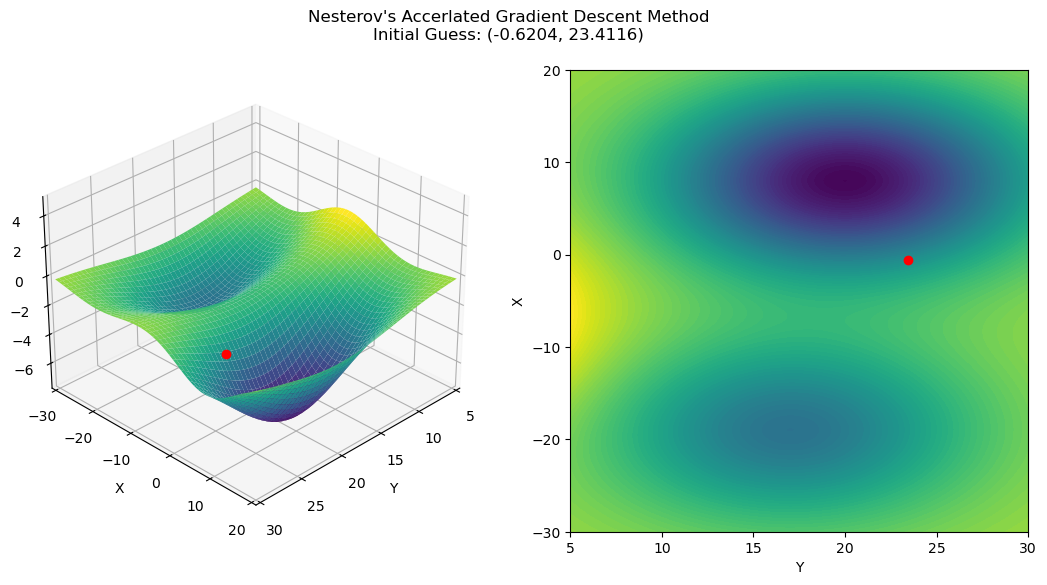

In [167]:
def nag(f, x0, alpha=0.1, beta=0.7, tol=1e-6, maxiter=10**5):
    # Get our initial guess
    x_vals = np.array([x0])
    x = x0
    v = np.zeros_like(x0)
    
    # Iterate until we converge
    for i in tqdm(range(maxiter)):
        # Get the gradient
        grad = opt.approx_fprime(x - beta*v, f, 1e-6)
        
        # Update our guess
        v_new = beta * v + alpha * grad
        x_new = x - v_new
        x_vals = np.vstack((x_vals, x_new))
        
        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            break
        
        x = x_new
        v = v_new
        
    return x_vals, i

# Define our initial guess
x0, y0 = np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)

# Create and add x0, y0 to the list
values = np.array([x0, y0])

# Perform gradient descent
values, iters = nag(f, values, tol=1e-8)
z_values = f(values.T)

print(f'Converged at x={values[-1][0]:.2f}, y={values[-1][1]:.2f} after {iters} iterations')

# Create subplots
axs = plt.figure(figsize=(13, 6), dpi=100)
axs.suptitle(f"Nesterov's Accerlated Gradient Descent Method\nInitial Guess: ({round(x0, 4)}, {round(y0, 4)})")

# Define our plotting stuff
ax1 = axs.add_subplot(121, projection='3d')
ax2 = axs.add_subplot(122)

# Set updates for our axes
ax1.plot_surface(Y, X, Z, cmap='viridis')
ax1.view_init(elev=30, azim=45)
ax1.set(xlim=(min_y, max_y), ylim=(min_x, max_x), zlim=(-7.5, 5), xlabel=r'Y', ylabel=r'X', zlabel=r'Z')

ax2.contourf(Y, X, Z, 100, cmap='viridis')
ax2.set(xlim=(min_y, max_y), ylim=(min_x, max_x), xlabel='Y', ylabel='X')

line1, = ax1.plot([], [], [], color='red', linestyle='-', marker='o', zorder=10)
line2, = ax2.plot([], [], color='red', linestyle='-', marker='o', zorder=10)

# Define the update function for animation
def update(frame):
    frame = int(frame)
    
    # Animate surface plot
    line1.set_data(values[:frame+1, 1], values[:frame+1, 0])
    line1.set_3d_properties([z_values[:frame+1]])

    # Animate contour plot
    line2.set_data(values[:frame+1, 1], values[:frame+1, 0])
    
    return (line1, line2)    
    
# Create the animation
ani = FuncAnimation(axs, update, frames=len(values), interval=50)
HTML(ani.to_html5_video())

In [168]:
# Save the graph as a gif.
ani.save("func3.gif", dpi=250, writer=PillowWriter(fps=20))

: 